el archivo de descarga de:
https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/bank_modified.csv

## importando librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

## cargando los datos

In [4]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_7/Data/bank_modified.csv'
data=pd.read_csv(archivo)

## primeras impresiones

In [5]:
data

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4517,57,-3313,153,1,-1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,0
4518,57,295,151,11,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4519,28,1137,129,4,211,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [8]:
data.dtypes

age                    int64
balance                int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_married        int64
marital_single         int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
default_yes            int64
housing_yes            int64
loan_yes               int64
y_yes                  int64
dtype: object

No hay nulos, puros variables numericas, se borraran duplicados

In [9]:
data.drop_duplicates(inplace=True)

separando la data

In [12]:
X = data.drop(columns=['y_yes'])
y = data["y_yes"]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5,stratify=y_val)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val=scaler.transform(X_val)

la matriz

In [14]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)

    plt.show()

## logistic regression

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_val,y_val)

0.887905604719764

sacando el pocentaje de las clases objetivo

In [18]:
y.value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [19]:
521/4000

0.13025

In [24]:
param_grid = [
    {'C':[1000,50,1,0.5,0.1,0.05],
    'class_weight':[{0: 0.13, 1: 0.87},{0: 0.10, 1: 0.90},{0: 0.8, 1: 0.2},{0: 0.05, 1: 0.95},{0: 0.4, 1: 0.6}],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1]}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='f1',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 270 candidates, totalling 540 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/linear_model

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1000, 50, 1, 0.5, 0.1, 0.05],
                          'class_weight': [{0: 0.13, 1: 0.87}, {0: 0.1, 1: 0.9},
                                           {0: 0.8, 1: 0.2}, {0: 0.05, 1: 0.95},
                                           {0: 0.4, 1: 0.6}],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             return_train_score=True, scoring='f1', verbose=1)

In [25]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 0.1, 'class_weight': {0: 0.13, 1: 0.87}, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [26]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.5023540489642184


In [27]:
log_reg = LogisticRegression(C=0.1,penalty='elasticnet',class_weight={0: 0.13, 1: 0.87},solver='saga',l1_ratio=0.5)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.13, 1: 0.87}, l1_ratio=0.5,
                   penalty='elasticnet', solver='saga')

In [28]:
log_reg.score(X_val,y_val)

0.8156342182890856

In [29]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       601
           1       0.38      0.72      0.49        78

    accuracy                           0.83       679
   macro avg       0.67      0.78      0.70       679
weighted avg       0.89      0.83      0.85       679



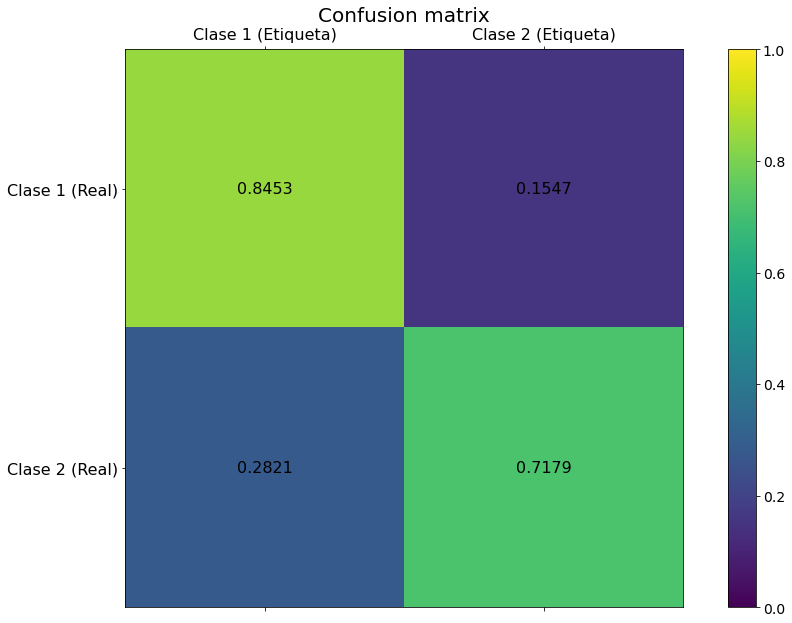

In [30]:
cm = metrics.confusion_matrix(y_test,predictions_regressor)
plotCMa(cm,['Clase 1','Clase 2'])

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/secodenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


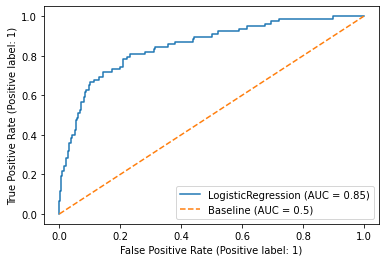

In [31]:
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend()

1. dada las caracteristicas del dataset, lo que más significa para el banco es el recall, ya que por el desbalanceo de clases hace que las personas que deberían haber obtenido un credito, no lo obtuvieron. Y viceversa, por ende hay que tener mucho ojo con esa medida. Junto con que el AUC es de 0.85 que no es malo, pero si es menor al esperado, que se justifica por la forma de la curva ROC
2. la precision es bastante parecida en ambos modelos, pero eso no significa que este bien, sino que no es el optimo del modelo y de la data.
3. quizas tratando de mejorar el recall en el gridsearch o de balancear la data de mejor manera